## Imports

In [13]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
import seaborn as sns
from sklearn.linear_model import Ridge

## Load Iris data set

In [3]:
iris = datasets.load_iris()
type(iris)
print(iris.keys())
type(iris.data), type(iris.target)
iris.data.shape
iris.target_names
X = iris.data
y= iris.target
df = pd.DataFrame(X, columns=iris.feature_names)

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [6]:
#import CSV file, index_col=0
data = pd.read_csv('C:/Users/Y/Documents/Python/Congressional_Voting.csv')
data.head()

#import Excel file
data1=pd.ExcelFile('Congressional_Voting.xlsx', index_col=0)
X1 = data1.parse(0)
y1 = data1.parse(2)

## Numerical EDA

In [91]:
type(data)

pandas.io.excel.ExcelFile

In [17]:
data.head()
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 18 columns):
Unnamed: 0           435 non-null int64
party                435 non-null object
infants              435 non-null int64
water                435 non-null int64
budget               435 non-null int64
physician            435 non-null int64
salvador             435 non-null int64
religious            435 non-null int64
satellite            435 non-null int64
aid                  435 non-null int64
missile              435 non-null int64
immigration          435 non-null int64
synfuels             435 non-null int64
education            435 non-null int64
superfund            435 non-null int64
crime                435 non-null int64
duty_free_exports    435 non-null int64
eaa_rsa              435 non-null int64
dtypes: int64(17), object(1)
memory usage: 61.2+ KB


,Unnamed: 0,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
count,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,218.000000,0.429885,0.558621,0.606897,0.406897,0.521839,0.650575,0.581609,0.590805,0.526437,0.512644,0.344828,0.393103,0.537931,0.609195,0.400000,0.857471
std,125.717938,0.495630,0.497123,0.489002,0.491821,0.500098,0.477337,0.493863,0.492252,0.499876,0.500416,0.475859,0.489002,0.499133,0.488493,0.490462,0.349994
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,109.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,218.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,326.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,435.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Visual EDA

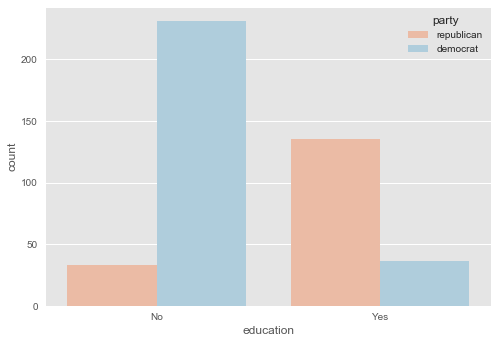

In [18]:
plt.figure()
sns.countplot(x='education', hue='party', data=data, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

## K-Nearest Neighbor: k=5

![](k_nearest_neighbor_1.png)

## Requirements to use KNeighborsClassifier:
### •features & target as numpy or dataframe
### •features takes on continuous values
### •requires no missing values in the data

### Task: Fit a k-Nearest Neighbors classifier to the voting dataset

In [19]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Create arrays for the features and the response variable
y = data['party'].values
X = data.drop('party', axis=1).values

# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

### Task: k-Nearest Neighbors: Predict

In [23]:
#import CSV file, index_col=0
#X_new = pd.read_csv('Documents/Python Scripts/X_new.csv')
X_new = pd.read_csv('C:/Users\Y\Documents\Python Scripts\X_new.csv')
X_new

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.626281,0.617251,0.766007,0.690135,0.413355,0.759617,0.264478,0.971762,0.820645,0.791677,0.182582,0.2287,0.673445,0.39588,0.515279,0.608789


##  Measuring Model Performance

#### •In classification, accuracy is a commonly used metric 
#### •Accuracy = Fraction of correct predictions 
### Therefore, split data into training and test set 
#### • Fit/train the classifier on the training set 
#### • Make predictions on test set 

## Model complexity 
#### • Larger k = smoother decision boundary = less complex model 
#### • Smaller k = more complex model = can lead to overfitting

![](k_nearest_neighbor_2.png)

![](k_nearest_neighbor_3.png)
### Sweet spot in the middle.(unlabeled arrow)

## The digits recognition dataset

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

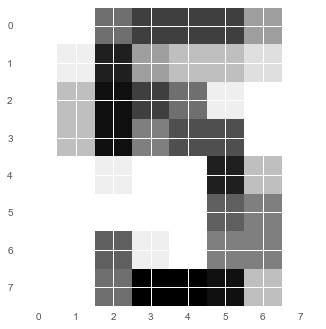

In [25]:
 # Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the digits dataset: digits
digits = datasets.load_digits()

# Print the keys and DESCR of the dataset
print(digits.keys())
print(digits.DESCR)

# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

## Train/Test Split + Fit/Predict/Accuracy

### Task:  After creating arrays for the features and target variable, split them into training and test sets, fit a k-NN classifier to the training data, and then compute its accuracy using the .score() method.

### Result:  This out of the box k-NN classifier with 7 neighbors has learned from the training data and predicted the labels of the images in the test set with 98% accuracy

In [26]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train,y_train)

# Print the accuracy
print(knn.score(X_test, y_test))


0.983333333333


##  Overfitting and underfitting

### Task: Compute and plot the training and testing accuracy scores for a variety of different neighbor values

### Result: The test accuracy is highest when using 3 and 5 neighbors. Using 8 neighbors or more seems to result in a simple model that underfits the data. 

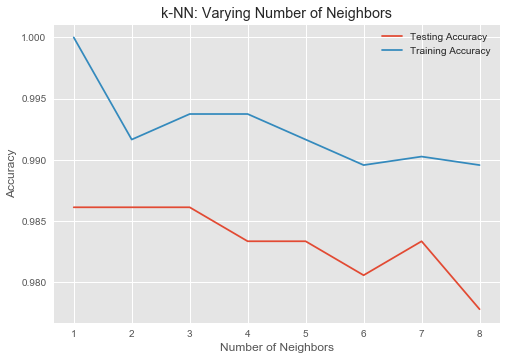

In [27]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn =  KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


## Importing data for supervised learning

### Task: Import the data and get it into the form needed by scikit-learn. This involves creating feature and target variable arrays. Furthermore, since you are going to use only one feature to begin with, you need to do some reshaping using NumPy's .reshape() method.  Then fit a linear regression with just one feature: 'fertility', which is the average number of children a woman in a given country gives birth to.

In [31]:
# Import numpy and pandas
import numpy as np
import pandas as pd

# Read the CSV file into a DataFrame: df
df = pd.read_csv('C:/Users/Y/Documents/Python Scripts/gapminder.csv')

# Create arrays for features and target variable
y = df['life'].values
X = df['fertility'].values

# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X.shape))

# Reshape X and y
y = y.reshape(-1,1)
X = X.reshape(-1,1)

# Print the dimensions of X and y after reshaping
print("Dimensions of y after reshaping: {}".format(y.shape))
print("Dimensions of X after reshaping: {}".format(X.shape))

Dimensions of y before reshaping: (139,)
Dimensions of X before reshaping: (139,)
Dimensions of y after reshaping: (139, 1)
Dimensions of X after reshaping: (139, 1)


## Background: Regression

#### • Y = ax + b 
#### • y = target 
#### • x = single feature 
#### • a, b = parameters of model 

### How do we choose a and b? 
#### •Define an error function for any given line 
#### • Choose the line that minimizes the error function

### The loss function 
#### Ordinary least squares (OLS): Minimize sum of squares of residuals 
![](loss_function.png)

### R^2: This quantifies the amount of variance in the target variable that is predicted from the feature variables

## Fit & predict for regression

### Task:  Fit a linear regression and predict life expectancy using just one feature. Use the 'fertility' feature of the Gapminder dataset, and  the target variable is 'life'.

### Result: The line captures the underlying trend in the data. This simple linear regression model captures 62% of the variance of life expectancy by using just one feature variable, fertility. 

R^2: 0.6192442167740035


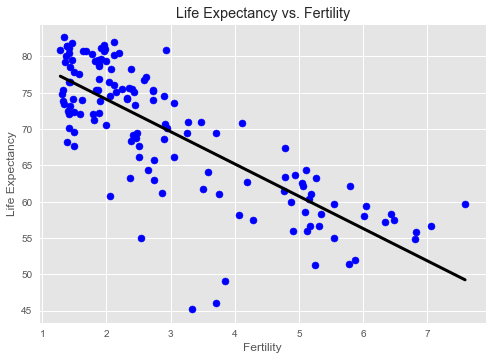

In [32]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression 

# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X), max(X)).reshape(-1,1)

# Fit the model to the data
reg.fit(X, y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print("R^2: {}".format(reg.score(X, y)))

import matplotlib.pyplot as plt
# Generate plot
plt.title('Life Expectancy vs. Fertility')
plt.xlabel('Fertility')
plt.ylabel('Life Expectancy')
plt.scatter(x=df['fertility'].values, y=df['life'].values, color='blue')
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.show()

## Train/test split for regression

#### Background: Train and test sets are vital to ensure that your supervised learning model is able to generalize well to new data.

### Task: Split the Gapminder dataset into training and testing sets, and then fit and predict a linear regression over all features.

### Result: Using all features has improved the model score, the R^2 is now .73. This makes sense, as the model has more information to learn from. 

In [10]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))


R^2: 0.2224076496611057
Root Mean Squared Error: 0.41956328491828304


## Problem with Splitting a data set, Solution-Cross-Validation
 
### • Model performance is dependent on way the data is split 
### • Not representative of the model's ability to generalize 
### • Solution: Cross-validation

<h1><center>5 Fold Cross-Validation</center></h1>
![](cross_validation.png)
<h3>More folds, more computationally expensive</h3>

## 5-fold cross-validation

### Task:  5-fold cross validation on the Gapminder data.

### Result: Using one feature with cross-validation has produced the same R^2 as without cross-validation or test/train, but with confidence about the ability of the model to generalize well to new data.

In [11]:
# Import the necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg,X,y,cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[ 0.25683342  0.2575739   0.29068798  0.28108337  0.29414534]
Average 5-Fold CV Score: 0.27606480052597404


## Background: Why Regularize

#### Recall: Linear regression minimizes a loss function 
#### It chooses a coefficient for each feature variable 
#### Large coefficients can lead to overfitting 
#### Penalizing large coefficients

![](ridge_regression_3.png)

#### Alpha: Parameter we need to choose 
#### Alpha controls model complexity 
##### • Alpha = o: We get back OLS (Can lead to overfitting) 
##### • Very high alpha: Can lead to underfitting

![](lasso_regression_1.png)

### Lasso regression for feature selection: 
####  Can be used to select important features of a dataset 
#####   •Because it shrinks the coefficients of less important features to exactly o



## Regularization: Lasso

#### Background:  Lasso performs regularization by adding to the loss function a penalty term of the absolute value of each coefficient multiplied by some alpha. This is also known as L1 regularization because the regularization term is the L1 norm of the coefficients. 

### Task: Fit a lasso regression to the Gapminder data

### Result: According to the lasso algorithm, it seems like 'child_mortality' is the most important feature when predicting life expectancy.

![](lasso_graph.png)

## Regularization: Ridge

#### Background: When building regression models, Ridge regression should be your first choice. 

### Task: Take the sum of the squared values of the coefficients multiplied by an alpha and compue the L2 norm.

### Result:  The cross-validation scores change with different alphas.

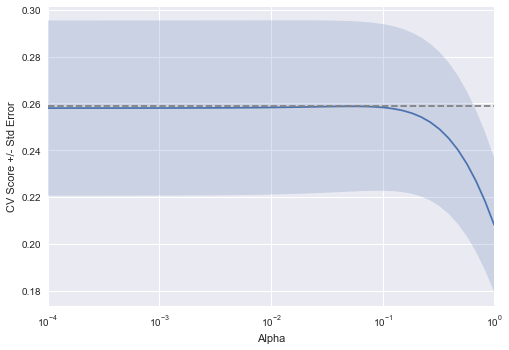

In [12]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)
    std_error = cv_scores_std / np.sqrt(10)
    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)


## Background: How good is your model?

### Classification metrics 
#### • Measuring model performance with accuracy: 
#####   - Fraction of correctly classified samples 
####    - Not always a useful metric

## Confusion Matrix: Spam example
![](confusion_matrix_1.png)

![](accuracy.png)
![](precision.png)
#### posititive predicted value=# correctly labeled spam e-mails / total # of e-mails classified as spam
#### high precision: Not many real emails predicted as spam 
![](recall.png)
#### true positive rate=sensitivity=hit rate
#### high recall: Predicted most spam emails correctly
![](F1_score.png)
#### harmonic mean of precision and recall

## Metrics for classification

#### Background: The PIMA Indians dataset was obtained from the UCI Machine Learning Repository.  A target value of 0 indicates that the patient does not have diabetes, while a value of 1 indicates that the patient does have diabetes.

### Task: Predict whether or not a given female patient will contract diabetes based on features such as BMI, age, and number of pregnancies.

In [14]:
import pandas as pd

#import Excel file
data=pd.ExcelFile('Diabetes_1.xlsx')
X = data.parse(1)
y = [1,	0,	1,	0,	1,	0,	1,	0,	1,	1,	0,	1,	0,	1,	1,	1,	1,	1,	0,	1,	0,	0,	1,	1,	1,	1,	1,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	1,	1,	1,	0,	0,	0,	1,	0,	1,	0,	0,	1,	0,	0,	0,	0,	1,	0,	0,	1,	0,	0,	0,	0,	1,	0,	0,	1,	0,	1,	0,	0,	0,	1,	0,	1,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	1,	0,	0,	0,	1,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1,	1,	0,	0,	1,	1,	1,	0,	0,	0,	1,	0,	0,	0,	1,	1,	0,	0,	1,	1,	1,	1,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	1,	1,	0,	0,	0,	1,	0,	0,	0,	0,	1,	1,	0,	0,	0,	0,	1,	1,	0,	0,	0,	1,	0,	1,	0,	1,	0,	0,	0,	0,	0,	1,	1,	1,	1,	1,	0,	0,	1,	1,	0,	1,	0,	1,	1,	1,	0,	0,	0,	0,	0,	0,	1,	1,	0,	1,	0,	0,	0,	1,	1,	1,	1,	0,	1,	1,	1,	1,	0,	0,	0,	0,	0,	1,	0,	0,	1,	1,	0,	0,	0,	1,	1,	1,	1,	0,	0,	0,	1,	1,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	1,	0,	1,	0,	0,	1,	0,	1,	0,	0,	1,	1,	0,	0,	0,	0,	0,	1,	0,	0,	0,	1,	0,	0,	1,	1,	0,	0,	1,	0,	0,	0,	1,	1,	1,	0,	0,	1,	0,	1,	0,	1,	1,	0,	1,	0,	0,	1,	0,	1,	1,	0,	0,	1,	0,	1,	0,	0,	1,	0,	1,	0,	1,	1,	1,	0,	0,	1,	0,	1,	0,	0,	0,	1,	0,	0,	0,	0,	1,	1,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	1,	1,	1,	0,	1,	1,	0,	0,	1,	0,	0,	1,	0,	0,	1,	1,	0,	0,	0,	0,	1,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	1,	1,	1,	0,	0,	1,	0,	0,	1,	0,	0,	1,	0,	1,	1,	0,	1,	0,	1,	0,	1,	0,	1,	1,	0,	0,	0,	0,	1,	1,	0,	1,	0,	1,	0,	0,	0,	0,	1,	1,	0,	1,	0,	1,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	1,	0,	0,	1,	1,	1,	0,	0,	1,	0,	0,	1,	0,	0,	0,	1,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	1,	0,	0,	0,	1,	1,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	1,	0,	0,	0,	1,	0,	0,	0,	1,	0,	0,	0,	1,	0,	0,	0,	0,	1,	1,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	1,	1,	1,	1,	0,	0,	1,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	1,	0,	1,	1,	0,	0,	0,	1,	0,	1,	0,	1,	0,	1,	0,	1,	0,	0,	1,	0,	0,	1,	0,	0,	0,	0,	1,	1,	0,	1,	0,	0,	0,	0,	1,	1,	0,	1,	0,	0,	0,	1,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	1,	0,	0,	1,	0,	0,	0,	1,	0,	0,	0,	1,	1,	1,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	1,	0,	1,	1,	1,	1,	0,	1,	1,	0,	0,	0,	0,	0,	0,	0,	1,	1,	0,	1,	0,	0,	1,	0,	1,	0,	0,	0,	0,	0,	1,	0,	1,	0,	1,	0,	1,	1,	0,	0,	0,	0,	1,	1,	0,	0,	0,	1,	0,	1,	1,	0,	0,	1,	0,	0,	1,	1,	0,	0,	1,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	1,	1,	1,	0,	0,	0,	0,	0,	0,	1,	1,	0,	0,	1,	0,	0,	1,	0,	1,	1,	1,	0,	0,	1,	1,	1,	0,	1,	0,	1,	0,	1,	0,	0,	0,	0,	1,	0,
]
data

# Import necessary modules
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

# Instantiate a k-NN classifier: knn
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[176  30]
 [ 56  46]]
             precision    recall  f1-score   support

          0       0.76      0.85      0.80       206
          1       0.61      0.45      0.52       102

avg / total       0.71      0.72      0.71       308



In [15]:
print(data.keys())

AttributeError: 'ExcelFile' object has no attribute 'keys'

## Logistic regression and the ROC curve

 
### • Logistic regression outputs probabilities 
#### If the probability 'p' is greater than 0.5: 
##### - The data is labeled '1' 
#### If the probability 'p' is less than 0.5: 
##### - The data is labeled 'o'

### Probability thresholds 
#### By default, logistic regression threshold = 0.5 
#### Not specific to logistic regression 
#### k-NN classifiers also have thresholds 

y = [1,	0,	1,	0,	1,	0,	1,	0,	1,	1,	0,	1,	0,	1,	1,	1,	1,	1,	0,	1,	0,	0,	1,	1,	1,	1,	1,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	1,	1,	1,	0,	0,	0,	1,	0,	1,	0,	0,	1,	0,	0,	0,	0,	1,	0,	0,	1,	0,	0,	0,	0,	1,	0,	0,	1,	0,	1,	0,	0,	0,	1,	0,	1,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	1,	0,	0,	0,	1,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1,	1,	0,	0,	1,	1,	1,	0,	0,	0,	1,	0,	0,	0,	1,	1,	0,	0,	1,	1,	1,	1,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	1,	1,	0,	0,	0,	1,	0,	0,	0,	0,	1,	1,	0,	0,	0,	0,	1,	1,	0,	0,	0,	1,	0,	1,	0,	1,	0,	0,	0,	0,	0,	1,	1,	1,	1,	1,	0,	0,	1,	1,	0,	1,	0,	1,	1,	1,	0,	0,	0,	0,	0,	0,	1,	1,	0,	1,	0,	0,	0,	1,	1,	1,	1,	0,	1,	1,	1,	1,	0,	0,	0,	0,	0,	1,	0,	0,	1,	1,	0,	0,	0,	1,	1,	1,	1,	0,	0,	0,	1,	1,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	1,	0,	1,	0,	0,	1,	0,	1,	0,	0,	1,	1,	0,	0,	0,	0,	0,	1,	0,	0,	0,	1,	0,	0,	1,	1,	0,	0,	1,	0,	0,	0,	1,	1,	1,	0,	0,	1,	0,	1,	0,	1,	1,	0,	1,	0,	0,	1,	0,	1,	1,	0,	0,	1,	0,	1,	0,	0,	1,	0,	1,	0,	1,	1,	1,	0,	0,	1,	0,	1,	0,	0,	0,	1,	0,	0,	0,	0,	1,	1,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	1,	1,	1,	0,	1,	1,	0,	0,	1,	0,	0,	1,	0,	0,	1,	1,	0,	0,	0,	0,	1,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	1,	1,	1,	0,	0,	1,	0,	0,	1,	0,	0,	1,	0,	1,	1,	0,	1,	0,	1,	0,	1,	0,	1,	1,	0,	0,	0,	0,	1,	1,	0,	1,	0,	1,	0,	0,	0,	0,	1,	1,	0,	1,	0,	1,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	1,	0,	0,	1,	1,	1,	0,	0,	1,	0,	0,	1,	0,	0,	0,	1,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	1,	0,	0,	0,	1,	1,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	1,	0,	0,	0,	1,	0,	0,	0,	1,	0,	0,	0,	1,	0,	0,	0,	0,	1,	1,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	1,	1,	1,	1,	0,	0,	1,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	1,	0,	1,	1,	0,	0,	0,	1,	0,	1,	0,	1,	0,	1,	0,	1,	0,	0,	1,	0,	0,	1,	0,	0,	0,	0,	1,	1,	0,	1,	0,	0,	0,	0,	1,	1,	0,	1,	0,	0,	0,	1,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	1,	0,	0,	1,	0,	0,	0,	1,	0,	0,	0,	1,	1,	1,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	1,	0,	1,	1,	1,	1,	0,	1,	1,	0,	0,	0,	0,	0,	0,	0,	1,	1,	0,	1,	0,	0,	1,	0,	1,	0,	0,	0,	0,	0,	1,	0,	1,	0,	1,	0,	1,	1,	0,	0,	0,	0,	1,	1,	0,	0,	0,	1,	0,	1,	1,	0,	0,	1,	0,	0,	1,	1,	0,	0,	1,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	1,	1,	1,	0,	0,	0,	0,	0,	0,	1,	1,	0,	0,	1,	0,	0,	1,	0,	1,	1,	1,	0,	0,	1,	1,	1,	0,	1,	0,	1,	0,	1,	0,	0,	0,	0,	1,	0,
]


##  Building a logistic regression model

### Task: Train a logistic regression model using the Diabetes data.

### Result:

In [80]:
# Import the necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

y = [1,	0,	1,	0,	1,	0,	1,	0,	1,	1,	0,	1,	0,	1,	1,	1,	1,	1,	0,	1,	0,	0,	1,	1,	1,	1,	1,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	1,	1,	1,	0,	0,	0,	1,	0,	1,	0,	0,	1,	0,	0,	0,	0,	1,	0,	0,	1,	0,	0,	0,	0,	1,	0,	0,	1,	0,	1,	0,	0,	0,	1,	0,	1,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	1,	0,	0,	0,	1,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1,	1,	0,	0,	1,	1,	1,	0,	0,	0,	1,	0,	0,	0,	1,	1,	0,	0,	1,	1,	1,	1,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	1,	1,	0,	0,	0,	1,	0,	0,	0,	0,	1,	1,	0,	0,	0,	0,	1,	1,	0,	0,	0,	1,	0,	1,	0,	1,	0,	0,	0,	0,	0,	1,	1,	1,	1,	1,	0,	0,	1,	1,	0,	1,	0,	1,	1,	1,	0,	0,	0,	0,	0,	0,	1,	1,	0,	1,	0,	0,	0,	1,	1,	1,	1,	0,	1,	1,	1,	1,	0,	0,	0,	0,	0,	1,	0,	0,	1,	1,	0,	0,	0,	1,	1,	1,	1,	0,	0,	0,	1,	1,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	1,	0,	1,	0,	0,	1,	0,	1,	0,	0,	1,	1,	0,	0,	0,	0,	0,	1,	0,	0,	0,	1,	0,	0,	1,	1,	0,	0,	1,	0,	0,	0,	1,	1,	1,	0,	0,	1,	0,	1,	0,	1,	1,	0,	1,	0,	0,	1,	0,	1,	1,	0,	0,	1,	0,	1,	0,	0,	1,	0,	1,	0,	1,	1,	1,	0,	0,	1,	0,	1,	0,	0,	0,	1,	0,	0,	0,	0,	1,	1,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	1,	1,	1,	0,	1,	1,	0,	0,	1,	0,	0,	1,	0,	0,	1,	1,	0,	0,	0,	0,	1,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	1,	1,	1,	0,	0,	1,	0,	0,	1,	0,	0,	1,	0,	1,	1,	0,	1,	0,	1,	0,	1,	0,	1,	1,	0,	0,	0,	0,	1,	1,	0,	1,	0,	1,	0,	0,	0,	0,	1,	1,	0,	1,	0,	1,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	1,	0,	0,	1,	1,	1,	0,	0,	1,	0,	0,	1,	0,	0,	0,	1,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	1,	0,	0,	0,	1,	1,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	1,	0,	0,	0,	1,	0,	0,	0,	1,	0,	0,	0,	1,	0,	0,	0,	0,	1,	1,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	1,	1,	1,	1,	0,	0,	1,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	1,	0,	1,	1,	0,	0,	0,	1,	0,	1,	0,	1,	0,	1,	0,	1,	0,	0,	1,	0,	0,	1,	0,	0,	0,	0,	1,	1,	0,	1,	0,	0,	0,	0,	1,	1,	0,	1,	0,	0,	0,	1,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	1,	0,	0,	1,	0,	0,	0,	1,	0,	0,	0,	1,	1,	1,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	1,	0,	1,	1,	1,	1,	0,	1,	1,	0,	0,	0,	0,	0,	0,	0,	1,	1,	0,	1,	0,	0,	1,	0,	1,	0,	0,	0,	0,	0,	1,	0,	1,	0,	1,	0,	1,	1,	0,	0,	0,	0,	1,	1,	0,	0,	0,	1,	0,	1,	1,	0,	0,	1,	0,	0,	1,	1,	0,	0,	1,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	1,	1,	1,	0,	0,	0,	0,	0,	0,	1,	1,	0,	0,	1,	0,	0,	1,	0,	1,	1,	1,	0,	0,	1,	1,	1,	0,	1,	0,	1,	0,	1,	0,	0,	0,	0,	1,	0,
]


# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[175  31]
 [ 36  66]]
             precision    recall  f1-score   support

          0       0.83      0.85      0.84       206
          1       0.68      0.65      0.66       102

avg / total       0.78      0.78      0.78       308



## Plotting an ROC curve

### Task: Classification reports and confusion matrices are great methods to quantitatively evaluate model performance, while ROC curves provide a way to visually evaluate models.

### Result: This ROC curve provides a nice visual way to assess your classifier's performance.

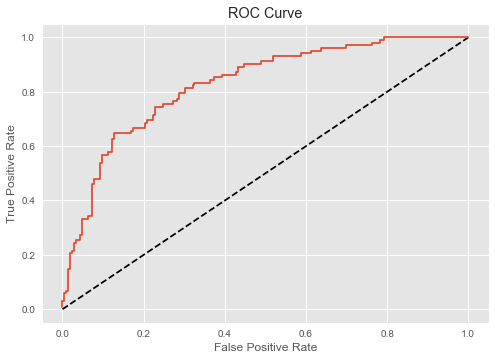

In [63]:
# Import necessary modules
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

## Area under the ROC curve

#### Background: • Larger area under the ROC curve = better model. If a binary classifier were just randomly making guesses. It would be correct approximately 50% of the time, and the resulting ROC curve would be a diagonal line in which the True Positive Rate and False Positive Rate are always equal. The Area under this ROC curve would be 0.5. If the AUC is greater than 0.5, the model is better than random guessing.

### Task: Calculate AUC scores and perform cross-validation on the diabetes dataset.


In [65]:
# Import necessary modules
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))


AUC: 0.8267656577193985
AUC scores computed using 5-fold cross-validation: [ 0.7987037   0.80777778  0.81944444  0.86622642  0.85075472]


## Background:

### Hyperparameter tuning:

#### • Linear regression: Choosing parameters 
#### • Ridge/lasso regression: Choosing alpha 
#### • k-Nearest Neighbors: Choosing n _ neighbors 
#### • Parameters like alpha and k: Hyperparameters cannot be learned by fitting the model

### Choosing the correct hyperparameter: 
#### •Try a bunch of different hyperparameter values 
#### •Fit all of them separately 
#### •See how well each performs 
#### •Choose the best performing one 
#### •It is essential to use cross-validation

<h1><center>Grid Search Cross-Validation</center></h1>
![](grid_search.png)

## Hyperparameter tuning with GridSearchCV

### Background:

#### Like the alpha parameter of lasso and ridge regularization that you saw earlier, logistic regression also has a regularization parameter: C. C controls the inverse of the regularization strength, and this is what you will tune in this exercise. A large C can lead to an overfit model, while a small C can lead to an underfit model.

### Task: Use GridSearchCV to do hyperparameter tuning with the diabetes data set.

### Result: It looks like a 'C' of 3.727 results in the best performance.

In [67]:
# Import necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X,y)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))


Tuned Logistic Regression Parameters: {'C': 19306.977288832535}
Best score is 0.7721354166666666


## Hyperparameter tuning with RandomizedSearchCV

#### GridSearchCV can be computationally expensive, especially if you are searching over a large hyperparameter space and dealing with multiple hyperparameters. A solution to this is to use RandomizedSearchCV, in which not all hyperparameter values are tried out. Instead, a fixed number of hyperparameter settings is sampled from specified probability distributions.

## Task: Use RandomizedSearchCV to do hyperparameter tuning with decision trees using the Diabetes data set.

In [75]:
# Import necessary modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X,y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))


Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 8, 'min_samples_leaf': 4}
Best score is 0.7395833333333334


## Hold-out set reasoning 

### How well can the model perform on never before seen data? 
#### • Using ALL data for cross-validation is not ideal 
#### • Split data into training and hold-out set at the beginning 
#### • Perform grid search cross-validation on training set 
#### • Choose best hyperparameters and evaluate on hold-out set

### The idea is to tune the model's hyperparameters on the training set, and then evaluate its performance on the hold-out set which it has never seen before.

##  Hold-out set in practice: Classification

### Task: Evaluating a model with tuned hyperparameters on a hold-out set using the diabetes data set. 

In [108]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression()

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, random_state=42)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the training data
logreg_cv.fit(X_train, y_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))


Tuned Logistic Regression Parameter: {'C': 3.7275937203149381, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 0.9555555555555556


## Preprocessing Data

## Dummy Variables: Dealing with categorical features 
### • Scikit-learn will not accept categorical features by default 
### • Need to encode categorical features numerically 
### • Convert to 'dummy variables' 
### • o: Observation was NOT that category 
### • 1: Observation was that category

![](dummy_var_1.png)

## Exploring categorical features

### Task: Create a box plot of the 'Region' feature vs. life expectancy of the Gapminder data set.

### Result:  The 'Region' feature contains useful information that can predict life expectancy. For example, Sub-Saharan Africa has a lower life expectancy compared to Europe and Central Asia. 

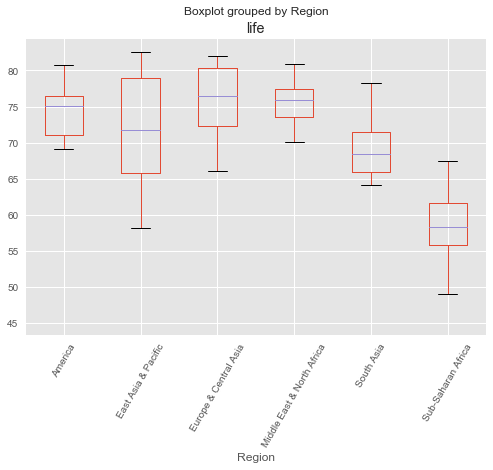

In [18]:
# Import pandas
import pandas as pd

# Read 'gapminder.csv' into a DataFrame: df
df = pd.read_csv('gapminder.csv')

# Create a boxplot of life expectancy per region
df.boxplot('life', 'Region', rot=60)

# Show the plot
plt.show()

## Creating dummy variables

### Task: Binarize the 'Region' feature of the Gapminder data set by creating dummy variables.

In [83]:
# Create dummy variables: df_region
df_region = pd.get_dummies(df)

# Print the columns of df_region
print(df_region.columns)

# Create dummy variables with drop_first=True: df_region
df_region = pd.get_dummies(df, drop_first=True)

# Print the new columns of df_region
print(df_region.columns)

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_America',
       'Region_East Asia & Pacific', 'Region_Europe & Central Asia',
       'Region_Middle East & North Africa', 'Region_South Asia',
       'Region_Sub-Saharan Africa'],
      dtype='object')
Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_East Asia & Pacific',
       'Region_Europe & Central Asia', 'Region_Middle East & North Africa',
       'Region_South Asia', 'Region_Sub-Saharan Africa'],
      dtype='object')


## Regression with categorical features

### Task: Build regression models using ridge regression to perform 5-fold cross-validation.

In [84]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

y = np.array([ 75.3,  58.3,  75.5,  72.5,  81.5,  80.4,  70.6,  72.2,  68.4,
        75.3,  70.1,  79.4,  70.7,  63.2,  67.6,  70.9,  61.2,  73.9,
        73.2,  59.4,  57.4,  66.2,  56.6,  80.7,  54.8,  78.9,  75.1,
        62.6,  58.6,  79.7,  55.9,  76.5,  77.8,  78.7,  61. ,  74. ,
        70.1,  74.1,  56.7,  60.4,  74. ,  65.7,  79.4,  81. ,  57.5,
        62.2,  72.1,  80. ,  62.7,  79.5,  70.8,  58.3,  51.3,  63. ,
        61.7,  70.9,  73.8,  82. ,  64.4,  69.5,  76.9,  79.4,  80.9,
        81.4,  75.5,  82.6,  66.1,  61.5,  72.3,  77.6,  45.2,  61. ,
        72. ,  80.7,  63.4,  51.4,  74.5,  78.2,  55.8,  81.4,  63.6,
        72.1,  75.7,  69.6,  63.2,  73.3,  55. ,  60.8,  68.6,  80.3,
        80.2,  75.2,  59.7,  58. ,  80.7,  74.6,  64.1,  77.1,  58.2,
        73.6,  76.8,  69.4,  75.3,  79.2,  80.4,  73.4,  67.6,  62.2,
        64.3,  76.4,  55.9,  80.9,  74.8,  78.5,  56.7,  55. ,  81.1,
        74.3,  67.4,  69.1,  46.1,  81.1,  81.9,  69.5,  59.7,  74.1,
        60. ,  71.3,  76.5,  75.1,  57.2,  68.2,  79.5,  78.2,  76. ,
        68.7,  75.4,  52. ,  49. ])

# Instantiate a ridge regressor: ridge
ridge = Ridge(alpha=.5, normalize=True)

# Perform 5-fold cross-validation: ridge_cv
ridge_cv = cross_val_score(ridge, X, y, cv=5)

# Print the cross-validated scores
print(ridge_cv)


[ 0.87758867  0.80165479  0.86362808  0.8071264   0.86761116]


## Handling missing data

### No missing values
![](PIMA_indian.png)

### But Insulin can't be 0 nor triceps (thickness of skin)
![](PIMA_indian_1.png)

### What to do?
#### Dropping missing data (could lead to much loss of data)
#### Impute missing data (make educated guess)
##### Use mean
##### Use median

##  Imputing missing data in a ML Pipeline I

In [92]:
# Import the Imputer module
from sklearn.preprocessing import Imputer
from sklearn.svm import SVC

# Setup the Imputation transformer: imp
imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)

# Instantiate the SVC classifier: clf
clf = SVC()

# Setup the pipeline with the required steps: steps
steps = [('imputation', imp),
        ('SVM', clf)]

## Centering & Scaling

### Why scale your data? 
#### •Many models use some form of distance to inform them 
#### •Features on larger scales can unduly influence the model 
#### •Example: k-NN uses distance explicitly when making predictions 
#### •We want features to be on a similar scale 

### Ways to normalize your data 
#### • Standardization: Subtract the mean and divide by variance 
##### - All features are centered around zero and have variance one 
#### • Can also subtract the minimum and divide by the range 
##### - Minimum zero and maximum one 
#### • Can also normalize so the data ranges from -1 to +1

In [ ]:
# Import necessary modules
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, random_state=42)

# Create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)

# Fit it to the training data
gm_cv.fit(X_train, y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))
